## Training 1

### Use sklearn

#### import packages

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')

#### read data 

In [143]:
df = pd.read_csv('data/linear_regression_data.csv')
X, y = df['X'].values, df['y'].values
m = y.size

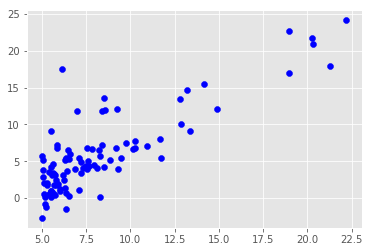

In [119]:
plt.scatter(X, y, c='b')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

77

In [32]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
y_pred = lr.predict(X_test)

In [39]:
mean_squared_error(y_test, y_pred)

9.83935487182348

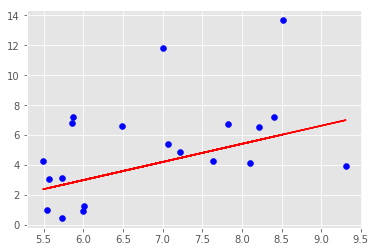

In [43]:
plt.scatter(X_test, y_test, c='b')
plt.plot(X_test, y_pred, c='r')

### From Scratch

$$y=w_1 \cdot X+ w_0 = \theta \cdot X$$

so add one column filled with 1 to X:

#### reshape the dataset

In [2]:
df = pd.read_csv('data/linear_regression_data.csv')
X, y = df['X'].values, df['y'].values
m = y.size

In [3]:
X = np.hstack((np.ones((m,1)),
              X.reshape((m,1)))) # include w_0
y = y.reshape((m,1))

In [4]:
X, y

(array([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

In [5]:
X.shape, y.shape

((97, 2), (97, 1))

#### initialize the value of theta (weight) as 0

In [6]:
theta = np.zeros((2,1))

#### predict function

In [7]:
def predict():
    return np.matmul(X, theta)

#### cost function

In [8]:
def cost(y_pred):
    return (1/(2*m))*np.sum((y_pred-y) **2)

#### gradient

In [9]:
def gradient(y_pred):
    return (1/m)*np.matmul(X.T, (y_pred- y))

#### specify hyperparameters

In [10]:
num_iter = 1500
learning_rate = 0.01

#### training loop

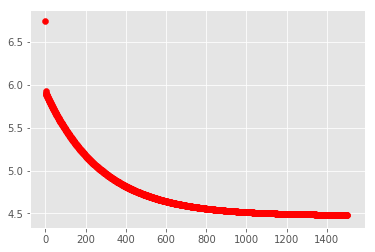

In [11]:
for iter in range(num_iter):
    y_pred = predict()
    g = gradient(y_pred)
    theta -= learning_rate*g
    y_pred = predict()
    c = cost(y_pred)
    plt.scatter(iter, c, c='r')

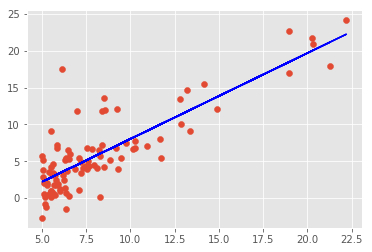

In [13]:
plt.scatter(X[:,1], y[:,0])
plt.plot(X[:,1], y_pred[:,0], c='b')